In [36]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

rcParams = {'font.size': 30, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Summarize(fp, sample):
    genome = "OSB"
    if "OSA" in fp:
        genome = "OSA"
    df = pd.read_csv(fp,sep = "\t")
    average_depth = df['Fold_Cov'].mean()
    std = df['Fold_Cov'].std()
    cov = std/average_depth
    Q1 = np.percentile(df['Fold_Cov'], 25)
    Q2 = np.percentile(df['Fold_Cov'], 50)
    Q3 = np.percentile(df['Fold_Cov'], 75)
    QD = (Q3 - Q1)/(Q3 + Q1)
    breadth = len(df[df['Fold_Cov'] > 0])/len(df)*100.0
    return [sample, average_depth, std, cov, QD, breadth, genome]


In [12]:
data_dir = '/Users/harihara/Mount/hotspring_metagenome/Synechococcus_paper_analysis/\
Differential_Read_Counting/'

In [13]:
samples = listdir(data_dir)

In [15]:
summary  = []
for s in samples:
    if (s.startswith("Hot")):
        sample = s.replace("_Diff_Read_Count","")
        print(sample)
        summary.append(Summarize(data_dir+s+'/Genome.OSA.Coverage', sample))
        summary.append(Summarize(data_dir+s+'/Genome.OSB.Coverage', sample))

Hotspr20Samplet1
Hotspr2Sample149
HotsprSampleR4cd
HotsprSampOS1260
HotsprSampleOS50
HotsprSampleMS50
HotsprSampleOS60
HotsprSampleMSe3
Hotspr20SampleT9
HotsprSampleOS55
HotsprSamplt10cd
HotsprSampleMSe4
HotsprSampleOSM1
HotsprSampleMS65
HotsprSampleOS65
HotsprSampOS1265
HotsprSampleOSM4
HotsprSampleMS55
HotsprSampleOSM3
HotsprottomLayer
Hotspr20SampleT8
Hotspr20SampleP4
HotsprottomLayer_2
HotsprSampleMSe1
Hotspr2Sampleme2
HotsprOSTMatCore
Hotspr2Sample148
HotsprSampleMS13
HotsprSampleMSe2
Hotspr2SamplePe2
Hotspr20Samplem2
HotsprSampleMS60
Hotspr2Sampleee2
HotsprSampleOSM2


In [22]:
df = pd.DataFrame(summary, columns = ['Sample','Depth','Deviation','COV','QD','Breadth','Genome'])

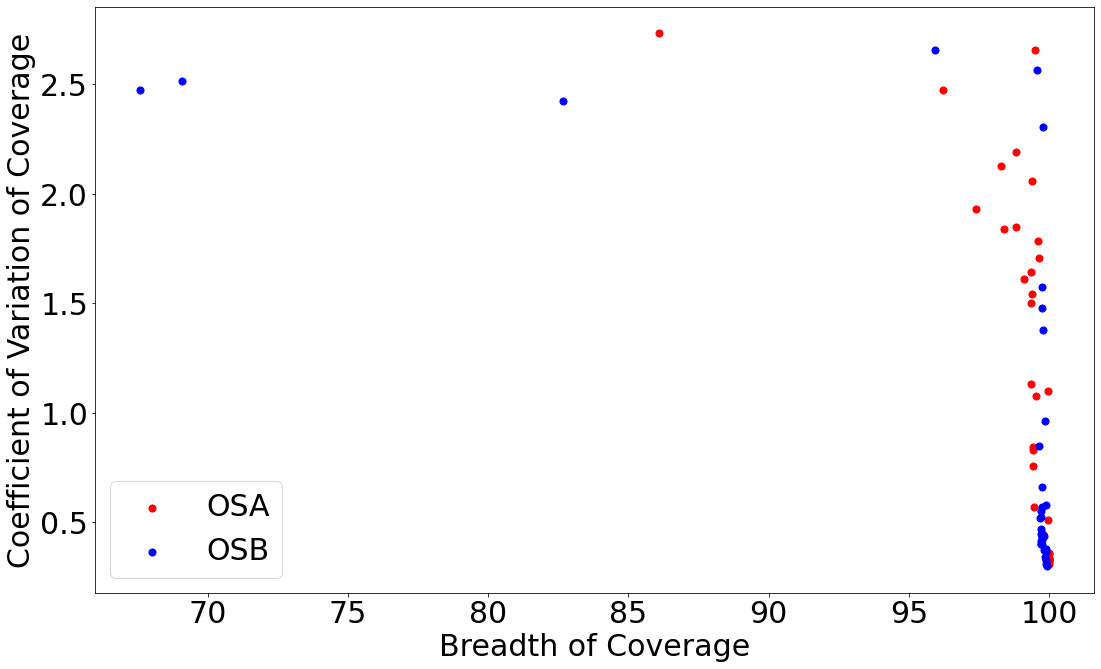

In [39]:
plt.rcParams.update(rcParams)

fig,ax = plt.subplots(1,1,figsize = (16,10))
df[df['Genome'] == 'OSA'].plot.scatter('Breadth','COV', color = 'red', ax = ax, s = 50, label = 'OSA')
df[df['Genome'] == 'OSB'].plot.scatter('Breadth','COV', color = 'blue', ax = ax, s = 50, label = 'OSB')
ax.set_xlabel('Breadth of Coverage')
ax.set_ylabel('Coefficient of Variation of Coverage')
fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Coverage-Stats.pdf')